In [1]:
from giskard_vision.landmark_detection.dataloaders.loaders import DataLoaderFFHQ
from giskard_vision.landmark_detection.dataloaders.wrappers import FilteredDataLoader, CachedDataLoader
from giskard_vision.landmark_detection.dataloaders.base import DataLoaderWrapper
from giskard_vision.landmark_detection.visualisation.draw import draw_marks

from abc import abstractmethod

dl = DataLoaderFFHQ("ffhq")

In [2]:
class WithMetaDataLoader(DataLoaderWrapper):
    def get_meta(self, idx):
        print(f"Should be displayed if not cached {idx}")
        return {"type": "even" if idx % 2 == 0 else "odd"}

In [3]:
dl = CachedDataLoader(WithMetaDataLoader(dl), cache_size=None, cache_img=False, cache_marks=False)
dl.name

'Cached WithMetaDataLoader(ffhq)'

In [4]:
len(dl)

11

In [5]:
elt = next(dl)

Should be displayed if not cached 0


In [6]:
type(elt)

tuple

In [7]:
elt[1].shape

(1, 68, 2)

In [8]:
type(elt[0])

tuple

In [9]:
type(elt[0][0])

numpy.ndarray

In [10]:
elt = next(dl)

Should be displayed if not cached 1


In [11]:
odds = FilteredDataLoader(dl, lambda elt: elt[2]["type"] == "odd")
len(odds)

Should be displayed if not cached 2
Should be displayed if not cached 3
Should be displayed if not cached 4
Should be displayed if not cached 5
Should be displayed if not cached 6
Should be displayed if not cached 7
Should be displayed if not cached 8
Should be displayed if not cached 9
Should be displayed if not cached 10


5

In [12]:
odds._reindex

[1, 3, 5, 7, 9]

In [13]:
evens = FilteredDataLoader(dl, lambda elt: elt[2]["type"] == "even")
len(evens)

6

In [14]:
evens._reindex

[0, 2, 4, 6, 8, 10]

In [15]:
evens.name

"(Cached WithMetaDataLoader(ffhq)) filtered using '<lambda>'"

In [16]:
import numpy as np

assert np.array_equal(dl[2][0], evens[1][0])
assert np.array_equal(dl[3][0], odds[1][0])
assert np.array_equal(dl[10][0], evens[5][0])
assert np.array_equal(dl[9][0], odds[4][0])

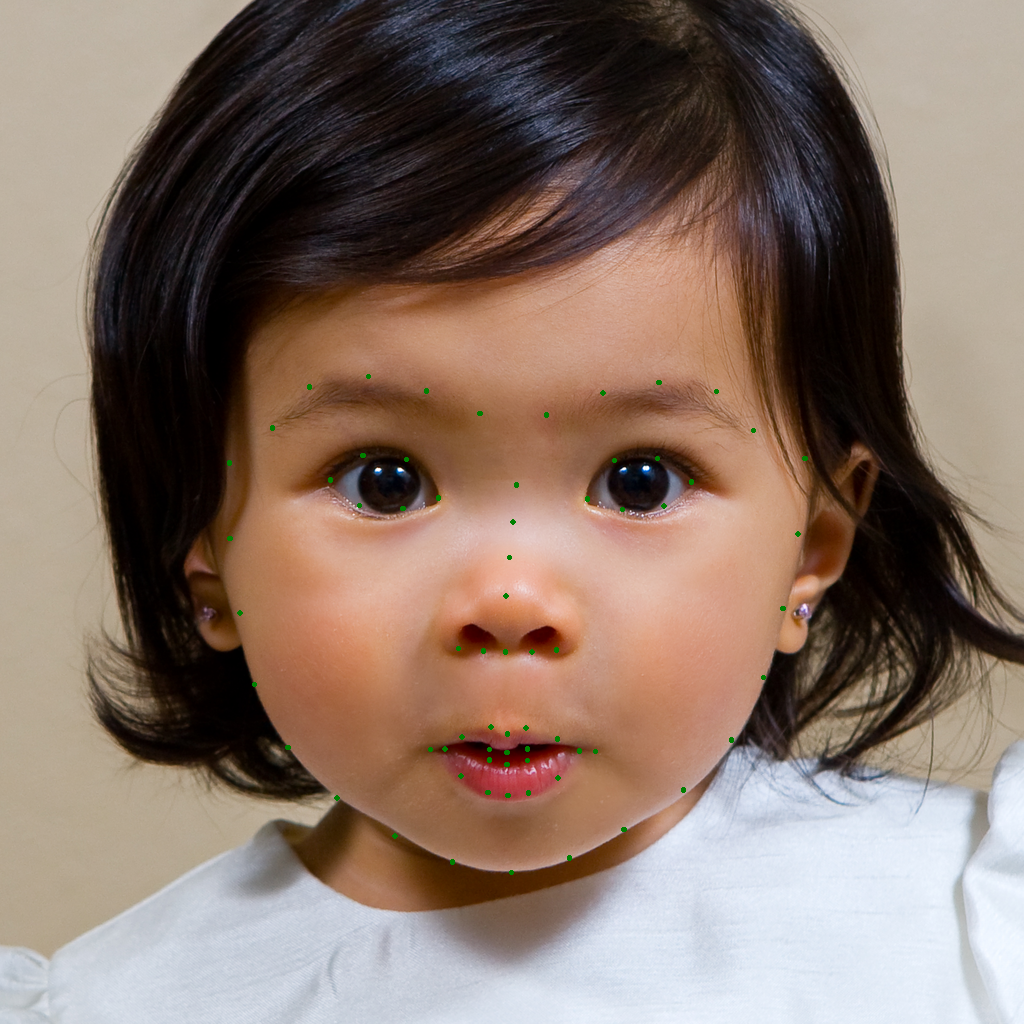

In [17]:
image, marks, meta = odds[1]
image, marks, meta = image[0], marks[0], meta[0]

draw_marks(image, [marks], ["green"])

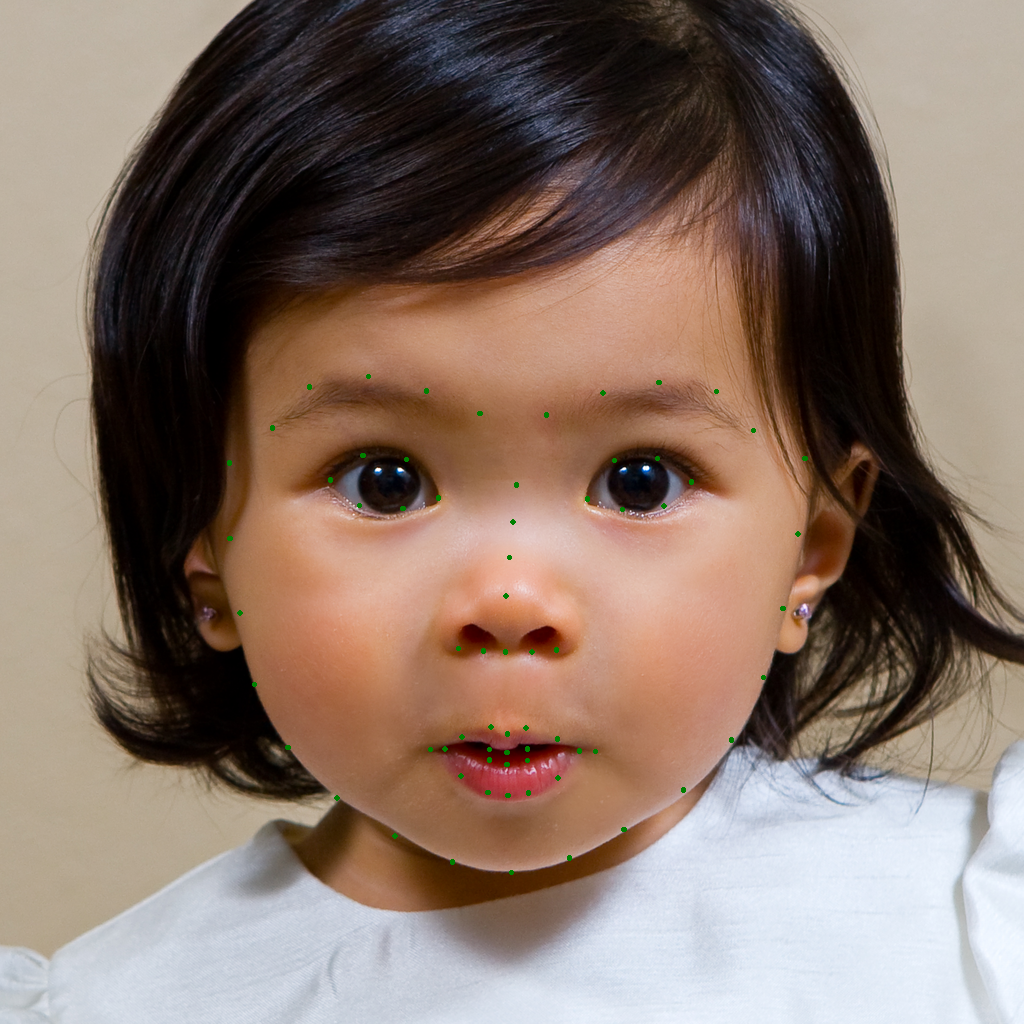

In [18]:
image, marks, meta = dl[3]
image, marks, meta = image[0], marks[0], meta[0]

draw_marks(image, [marks], ["green"])